# **Telco Churn Prediction**

Greetings! In this project we will use machine learning to predict customer churn. The data used was extracted from kaggle can be found [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

### First of all, we should review the concept of **churn**: 

According to the [Cambridge Dictionary](https://dictionary.cambridge.org/dictionary/english/churn), the word churn in Business means "the situation in which customers stop buying the products or services of a particular company, especially to buy them from a competitor".

For this project, we are not interested in investigating wheter the customer bought services from a competitor after leaving the company, only if they opted out of Telco's services.

### What is the model supposed to do?

The objective of the model we are building is to, based on diverse information about Telco's customers, predict wheter they are going to churn or not. The model is going to be trained and tested using data already collected about customers who did and didn't churn.

### If we already know the customers who churned from the data, why build the model?

Although we are using data from the past to train and test the model, once the model is finished, it can be fed data from the current clients and predict the ones who are probable to churn, so the company can create strategies and invest resources in preventing their churn. 

By doing this, the company can prevent a high quantity of money loss, as well as understand the factors or products that make their clients churn.

### What data are we going to use?

According to the data card found on kaggle, each row represents a customer and each column a customer attribute. We have 21 columns, the one named "Churn" being the target. We can find below the description of each column.


**Summary of the data columns:**

- customerID          -> ID assigned to the customer
- gender              -> Whether the customer is a male or a female
- SeniorCitizen       -> Whether the customer is a senior citizen or not (1, 0)
- Partner             -> Whether the customer has a partner or not (Yes, No)
- Dependents          -> Whether the customer has dependents or not (Yes, No)
- tenure              -> Number of months the customer has stayed with the company
- PhoneService        -> Whether the customer has a phone service or not (Yes, No)
- MultipleLines       -> Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService     -> Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity      -> hether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup        -> Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection    -> Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport         -> Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV         -> Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies     -> Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract            -> The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling    -> Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod       -> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges      -> The amount charged to the customer monthly
- TotalCharges        -> The total amount charged to the customer
- Churn               -> Whether the customer churned or not within the last month (Yes or No)

In [538]:
#importing the relevant libraries
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [539]:
#importing the data
df_telco_raw = pd.read_csv(r'data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_telco_churn = df_telco_raw.copy()

Now, lets gather the first information about the data.

In [540]:
df_telco_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [541]:
df_telco_churn.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

In [542]:
df_telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [543]:
df_telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Remarks:**

- There are no missing values on the data.
- There are 3 datatypes detected initially, float, integer and object.
- There are, in total, 7043 rows and 21 columns on the dataset.
- The column 'SeniorCitizen' is the only one using (1,0) instead of (Yes, No) for the classification.
- The column 'TotalCharges' has been detected as an object, although we know it should be a float by the column description. That might have happened due to blank spaces in the data.

**Actions:**

- Remove 'customerID' column, as it's meaningless for the model we are building.
- We should conform the 'SeniorCitizen' column to the standard for now, using (Yes, No). This will assist the EDA.
- Remove possible errors from the column 'TotalCharges' and cast to float.


In [544]:
df_telco_churn.drop('customerID',axis=1, inplace=True)
df_telco_churn['SeniorCitizen'] = df_telco_churn['SeniorCitizen'].astype('str')
df_telco_churn['SeniorCitizen'] = df_telco_churn['SeniorCitizen'].str.replace('1', 'Yes')
df_telco_churn['SeniorCitizen'] = df_telco_churn['SeniorCitizen'].str.replace('0', 'No')

In [545]:
#finding if there are blank spaces
print(df_telco_churn[df_telco_churn['TotalCharges']==' '])

      gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No           

We can see that the blank spaces are inserted where the tenure is 0, so there should be no values for 'TotalCharges', because the clients are new to the service, they didn't pay the first month yet. We should replace the blank spaces with zeros.

In [546]:
df_telco_churn['TotalCharges'] = df_telco_churn['TotalCharges'].str.replace(' ', '0')
df_telco_churn['TotalCharges'] = df_telco_churn['TotalCharges'].astype('float64')

Now that we handled the first changes, we should separate categorical and numeric features for the EDA, as well as isolate the target. We can use the Summary of the data columns for that.

In [547]:
df_telco_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [548]:
cat_features = ['gender', 'PaperlessBilling', 'PhoneService', 'Partner',
       'SeniorCitizen', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'OnlineBackup', 'PaymentMethod']

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

target = 'Churn'

# Exploratory data analysis

Now, lets perform the Exploratory data analysis, i.e., EDA. Our objective is to gain insights from the data, understanding hidden patterns, anomalies and correlation, before starting to build any kind of machine learning model. We are going to separe the analysis in three parts, the study of the numerical features, categorical features and the target.

## Numerical Features

In order to analyze the numerical features, we will build 3 graphs. The boxblots will display how the data is spread out and if there are any outliers. The pairplot will show us the pairwise relationships of the features, exploring possible correlations. The density estimate plots will describe the relationship of the numerical features with the target, therefore, investigating possible correlations between them.

In [549]:
#Choosing the color palette to be used in the plots
palette = sns.color_palette('PuOr')
two_color_palette = [palette[5], palette[1]]
one_color_palette = palette[5]
display(palette)

[(0.7746251441753171, 0.4129181084198385, 0.04613610149942329),
 (0.9765474817377932, 0.6925028835063436, 0.34571318723567845),
 (0.9885428681276432, 0.9031910803537101, 0.7836985774702038),
 (0.8804306036139947, 0.8861207227989235, 0.9344867358708189),
 (0.671126489811611, 0.6404459823144946, 0.8030757400999616),
 (0.40046136101499424, 0.2756632064590542, 0.5914648212226067)]

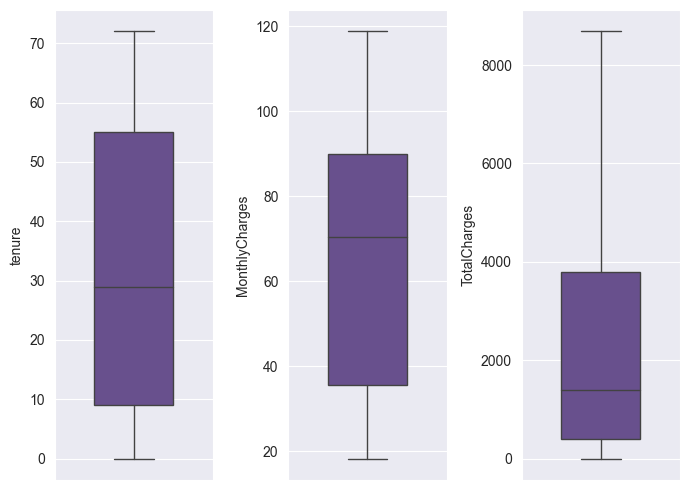

In [550]:
#building the boxplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(7,5)
sns.boxplot(y=df_telco_churn['tenure'], ax=ax1, width=0.5, linewidth=1, color=one_color_palette)
sns.boxplot(y=df_telco_churn['MonthlyCharges'], ax=ax2, width=0.5, linewidth=1, color=one_color_palette)
sns.boxplot(y=df_telco_churn['TotalCharges'], ax=ax3, width=0.5, linewidth=1, color=one_color_palette)
fig.tight_layout()
plt.show();

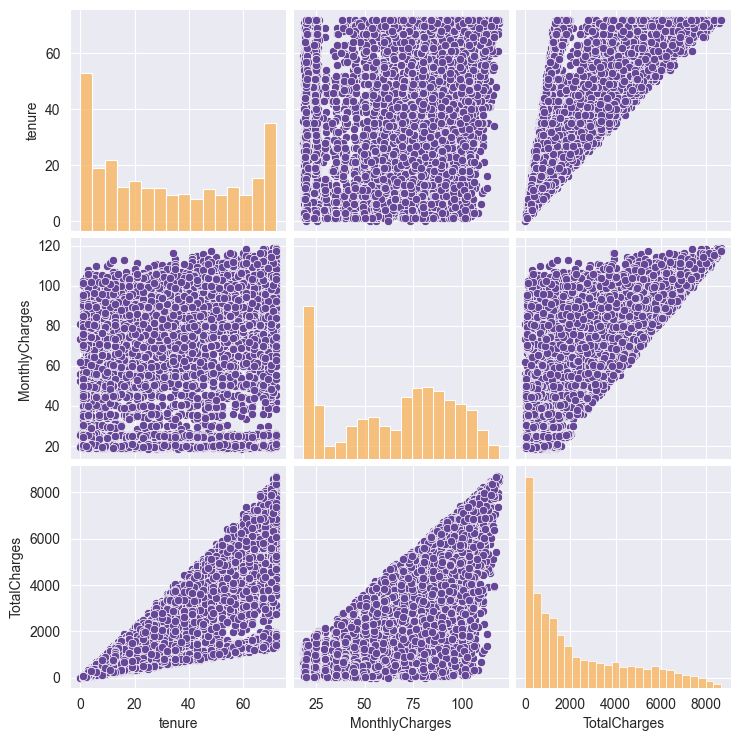

In [551]:
#building the pairplot
sns.pairplot(data=df_telco_churn[num_features], plot_kws={'color':two_color_palette[0]}, diag_kws={'color':two_color_palette[1]});

In [552]:
#inspecting the pearson correlation coefficients for precise analysis
print(np.corrcoef(df_telco_churn[num_features], rowvar=False))

[[1.         0.24789986 0.8261784 ]
 [0.24789986 1.         0.65117383]
 [0.8261784  0.65117383 1.        ]]


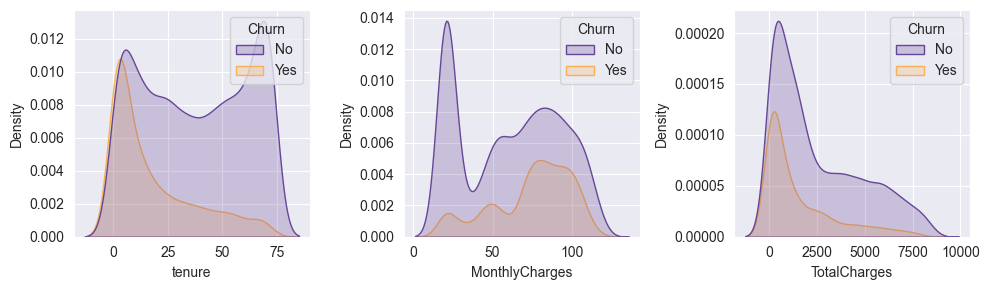

In [553]:
#building the density estimate plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(10,3)
sns.kdeplot(df_telco_churn, x='tenure', hue=target, ax=ax1, fill=True, palette= two_color_palette)
sns.kdeplot(df_telco_churn, x='MonthlyCharges', hue=target, ax=ax2, fill=True, palette= two_color_palette)
sns.kdeplot(df_telco_churn, x='TotalCharges', hue=target, ax=ax3, fill=True, palette= two_color_palette)
fig.tight_layout()
plt.show()

**Remarks:**

- There are no apparent outliers in the data, according to the boxplots.
- The feature 'TotalCharges' presented a significant correlation with the other features on the pairplot analysis, and a low correlation with the Target, as observed in the density estimate plot. That leads us to think that the feature might not be very useful for our model.

**Actions:**

- Remove the feature 'TotalCharges' from the dataframe and update the num_features list.

In [554]:
df_telco_churn.drop('TotalCharges',axis=1, inplace=True)

In [555]:
num_features = ['tenure', 'MonthlyCharges']

## Categorical Features

As for the categorical features, we should investigate their relationship with the target, to understand which will be most useful for our prediction. Considering that the target is also categorical, a great tool to display that kind of relationship is the histogram. We will plot a histogram for each feature, contrasting the distribution of customer behavior for each class of that feature. The features in which the distribution of customer behavior is similar for each class, might not be very useful for predicting the customer behavior later on.

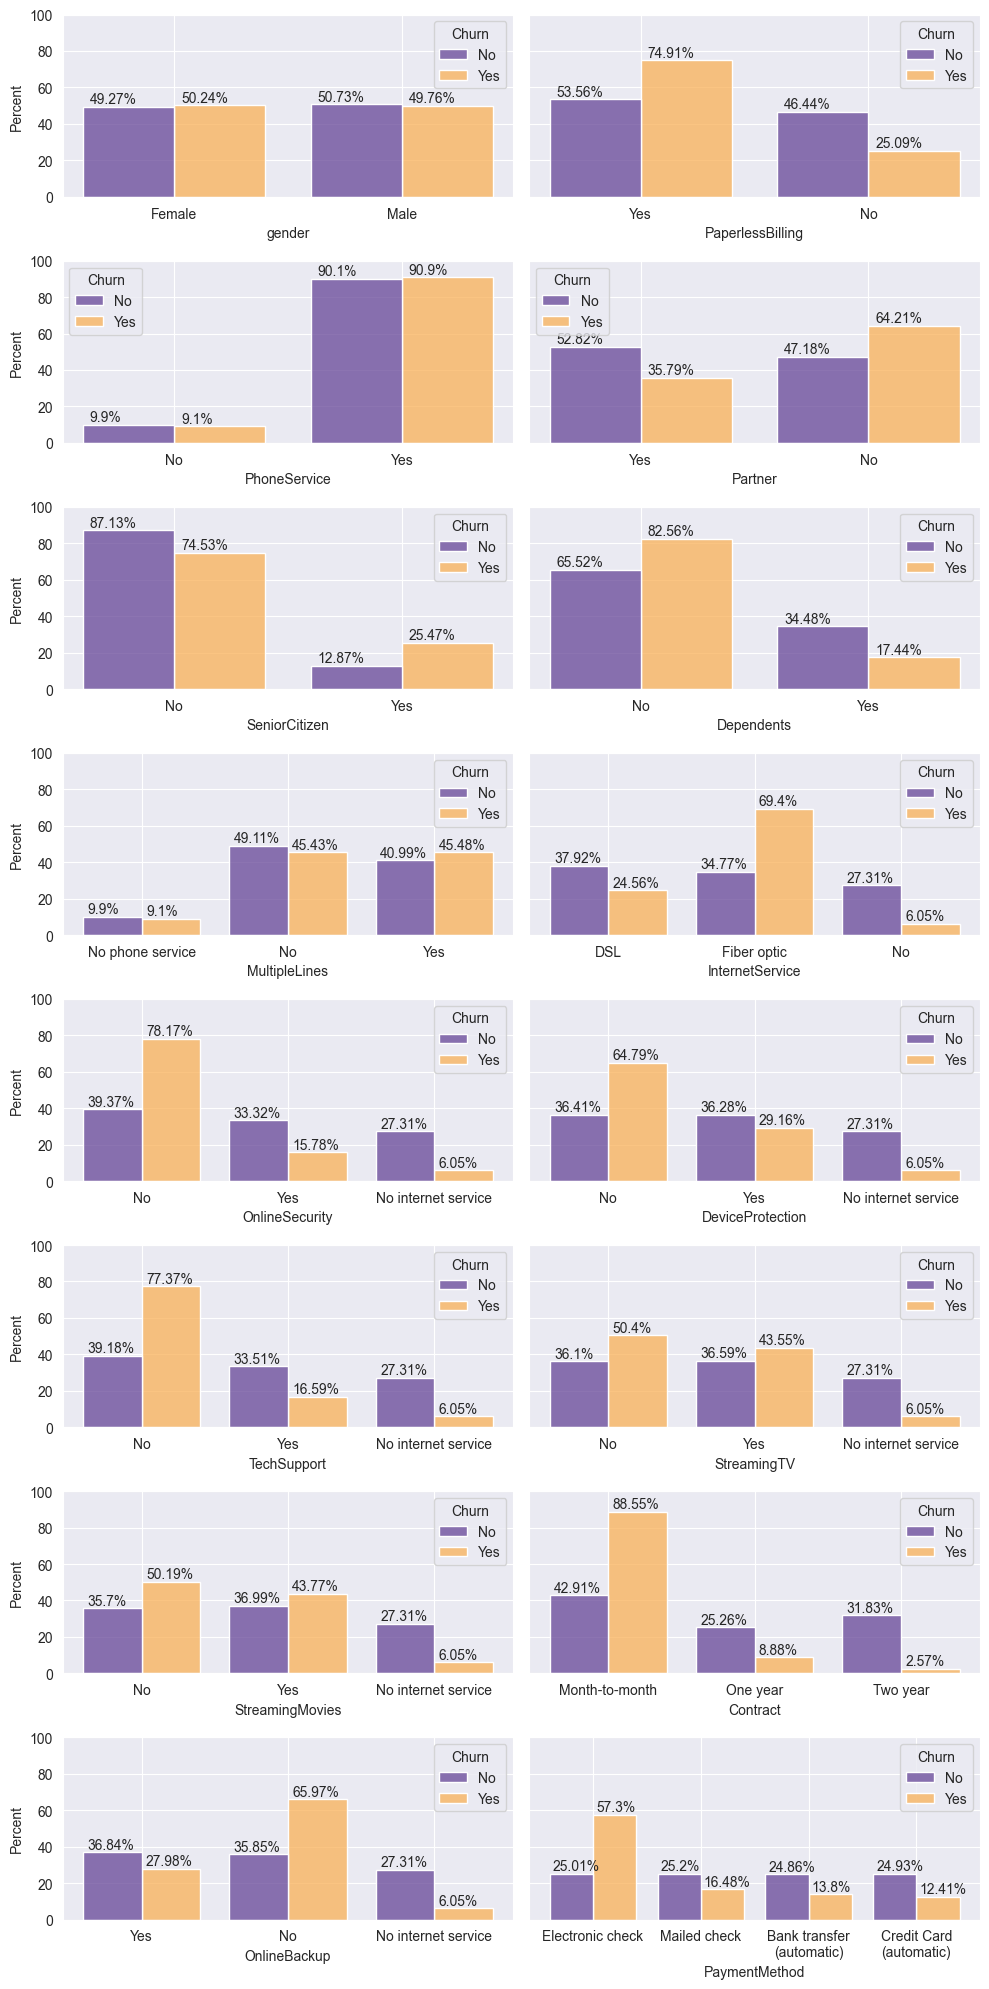

In [556]:
fig, axs = plt.subplots(8,2, sharey=True)
fig.set_size_inches(10,20)
k = 0
for i in range(8):
    for j in range (2):
        graph = sns.histplot(data=df_telco_churn, x=cat_features[k], hue=target, multiple="dodge", 
                  stat='percent', shrink = 0.8, common_norm=False, ax=axs[i,j], palette=two_color_palette);
        axs[i,j].set_ylim(0,100)

        for patch in axs[i,j].patches:
            txt = str(patch.get_height().round(2)) + '%'
            txt_x = patch.get_x()+0.03
            txt_y = patch.get_height()+2
            axs[i,j].text(txt_x,txt_y,txt)

        k += 1

axs[7,1].set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer\n(automatic)', 'Credit Card\n(automatic)'])

fig.tight_layout()
plt.show();

**Remarks:**

- The features 'gender', 'PhoneService' and 'MultipleLines' showed a high similarity in the distribution of customers who did and didn't churn for each class, so they might not be very useful for our model.

**Actions:**

- Remove the features 'gender', 'PhoneService' and 'MultipleLines' from the dataframe and update de cat_features list.

In [557]:
df_telco_churn.drop(['gender', 'PhoneService', 'MultipleLines'],axis=1, inplace=True)

In [558]:
cat_features = ['PaperlessBilling', 'Partner',
       'SeniorCitizen', 'Dependents', 'InternetService',
       'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'OnlineBackup', 'PaymentMethod']

## Target

As for the target, there is always a simple and important question to make: Are the classes balanced? Imbalanced classes can lead to bias when building machine learning models.

In [559]:
counts = df_telco_churn[target].value_counts()
counts

No     5174
Yes    1869
Name: Churn, dtype: int64

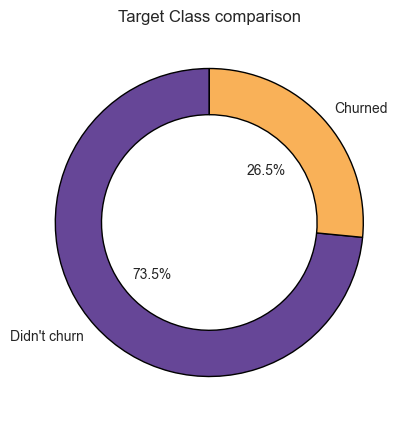

In [560]:
fig, ax = plt.subplots(figsize=(5,5))
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':1}
plt.pie(counts, autopct='%1.1f%%', labels=["Didn't churn", 'Churned'], 
        wedgeprops=wedgeprops, startangle=90, pctdistance=0.5, labeldistance=1.1, colors= two_color_palette)
ax.set_title('Target Class comparison')

plt.show()

**Remarks:**

- There is class imbalance in the target column, there are much more negative observations.

**Actions:**

- We should test using a balancing technique when building the models.

# Model building

Now that the EDA is done and we took the desired actions to clean the data, it's time to begin building machine learning models.Before building the models, we are going to take two important steps: 
- We should replace the target string classes with boolean values, so they are meaningful to the algorithms.
- To guarantee that the model is going to perform well with unseen data, we have to split the dataset, reserving a fraction to be used for testing.

In [561]:
#replacing the target classes with boolean values
df_telco_churn[target].replace({'Yes':1, 'No':0},inplace=True)

In [562]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    df_telco_churn.drop(columns=target),
    df_telco_churn[target],
    train_size=0.7,
    random_state=42,
    stratify=df_telco_churn[target]
)

## Building Baseline Logistic Regression Model

At first, we should build a baseline model to give us the understanding of how well a basic estimator will perform, so we can compare it later with the more advanced models.

In [563]:
#building baseline model pipeline
num_transformer_pipe = Pipeline([
    ('scaler', StandardScaler())
])

cat_transformer_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

pre_processor = ColumnTransformer([
    ('num_transformer', num_transformer_pipe, num_features),
    ('cat_transformer', cat_transformer_pipe, cat_features)
])

base_logreg_pipe = Pipeline([
    ('pre_processor', pre_processor),
    ('estimator', LogisticRegression(random_state=42))
])

base_logreg_pipe

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract', 'OnlineBackup',
                                                   'PaymentMethod'])])),
                ('estimator', LogisticRegression(random_state=42))])

In [564]:
#fit and predict
base_logreg_pipe.fit(X_train,y_train)
y_pred_base_logreg = base_logreg_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

roc_auc_score: 0.8417257015270962


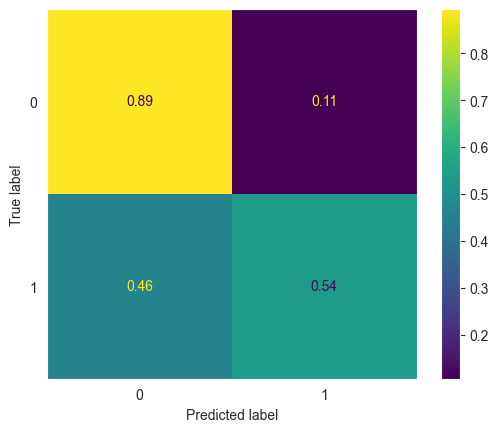

In [565]:
print(classification_report(y_test, y_pred_base_logreg))
auc_base_logreg = roc_auc_score(y_test, base_logreg_pipe.predict_proba(X_test)[:,1])
print(f'roc_auc_score: {auc_base_logreg}')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_base_logreg, normalize='true')).plot()
plt.grid(False);

With the baseline model, we can already get some promising indicators. Overall, the model is pretty good at recognizing the negative class, i.e., the clients which did not churn. But, for the model to be more effective, we should try to improve the recognition of the clients who did churn. This discrepancy in the clases recognition capability may be happening due to class imbalance.

## Tuning and Testing Models

In order to get better performance with the model, we should try 3 different strategies:

- Testing other estimators
- Using a class balancing technique
- Tuning model hyperparameters

We are also going to build a pipeline assembling function, in favor of quickening the testing process. For the class balancing technique, we are going to test using ADASYN, a oversampling algorithm from the Imbalanced-learn library. For the hyperparameter tuning, we are going to use RandomizedSearchCV, from the Scikit-learn library. We are going to test, for each estimator, hyperparameter tuning alone and with ADASYN.

Using these techniques, we can achieve our three strategies in a practical and agile way. Now lets build our models! After that, we are going to summarize the results and compare them.

In [566]:
#building the pipeline assembling function
def get_pipeline(num_features: list, cat_features: list, estimator, balancing=None):
    """Returns a pipeline with the necessary steps for this dataset using the chosen estimator and balancing technique."""
    pipe_tr_num_features = Pipeline([
        ('tr_min_max', StandardScaler())
    ])

    pipe_tr_cat_features = Pipeline([
        ('tr_dummy', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

    pre_processor = ColumnTransformer([
        ('tr_num', pipe_tr_num_features, num_features),
        ('tr_cat', pipe_tr_cat_features, cat_features)
    ])

    balancing = balancing

    final_pipe = Pipeline([
        ('pre_processor', pre_processor),
        ('balancing', balancing),
        ('estimator', estimator)
    ])

    return final_pipe

There is also another useful function that we can create, one that inserts a pipeline into a RandomizedSearchCV method, fits and predict on our data. This will help us to try many models in a fast way.

In [567]:
#building the RandomizedSearchCV fit and predict function
def random_search_fit_predict(param_dist:dict, estimator, X_train, y_train, X_test, random_state=42, scoring='roc_auc'):
    """Implements RandomizedSeachCV on a pipeline, fits and predicts using the given dataset."""    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    rand_pipe = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_dist,
    scoring=scoring,
    cv=cv,
    verbose=1,
    random_state=random_state
    )

    rand_pipe.fit(X_train, y_train)
    y_pred = rand_pipe.predict(X_test)

    return rand_pipe, y_pred

### Logistic Regression Model

For our first tuned model, we are going to use Logistic Regression again. It is important, at first, to examine the effects of balancing the classes in our model. For that, we are going to plot the confusion matrices, in addition to the usual classification reports and roc_auc_scores.

In [568]:
logreg_pipe = get_pipeline(num_features=num_features, cat_features=cat_features, estimator=LogisticRegression(random_state=42))
logreg_pipe

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_min_max',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('tr_cat',
                                                  Pipeline(steps=[('tr_dummy',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract', 'OnlineBackup',
                                                   'PaymentMethod'])])),
                ('balancing', None),
                ('estimator', LogisticRegression(random_state=42))])

In [569]:
logreg_bl_pipe = get_pipeline(num_features=num_features, cat_features=cat_features, estimator=LogisticRegression(random_state=42), balancing=ADASYN(random_state=42))
logreg_bl_pipe

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_min_max',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('tr_cat',
                                                  Pipeline(steps=[('tr_dummy',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['PaperlessBilling',
                                                   'Partner', 'SeniorCitizen',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract', 'OnlineBackup',
                                                   'PaymentMethod'])])),
                ('balancing', ADASYN(random_state=42)),
                ('estimator', LogisticRegression(random_state=42))])

In [570]:
param_dist_logreg = {
    'estimator__penalty': ['none', 'elasticnet', 'l1', 'l2'],
    'estimator__C':[0.01, 0.1, 1, 10, 100],
    'estimator__solver':['lbfgs', 'liblinear', 'newton-cg', 'saga']
}

rand_logreg, y_pred_logreg = random_search_fit_predict(param_dist_logreg, logreg_pipe, X_train, y_train, X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.65      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

roc_auc_score: 0.841790019662973


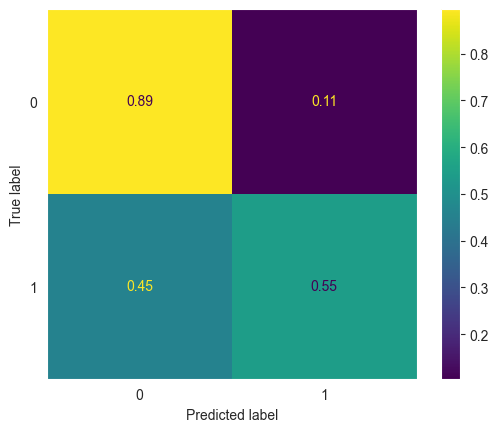

In [571]:
print(classification_report(y_test, y_pred_logreg))
print(f'roc_auc_score: {roc_auc_score(y_test, rand_logreg.predict_proba(X_test)[:,1])}')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logreg, normalize='true')).plot()
plt.grid(False);

In [572]:
rand_bl_logreg, y_pred_bl_logreg = random_search_fit_predict(param_dist_logreg, logreg_bl_pipe, X_train, y_train, X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1552
           1       0.50      0.82      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.73      0.75      2113

roc_auc_score: 0.8396996802469816


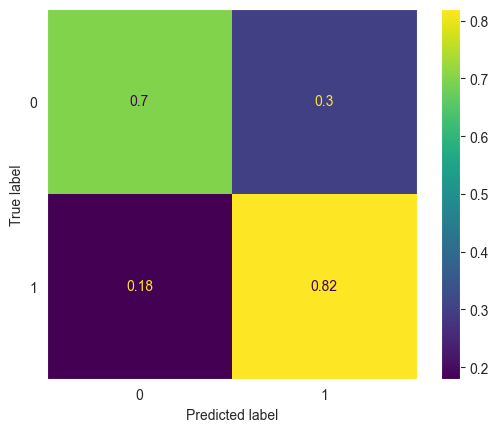

In [573]:
print(classification_report(y_test, y_pred_bl_logreg))
print(f'roc_auc_score: {roc_auc_score(y_test, rand_bl_logreg.predict_proba(X_test)[:,1])}')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_bl_logreg, normalize='true')).plot()
plt.grid(False);

Observing the confusion matrices above, we can see the effects of the balancing technique. Using ADASYN for the balanced model has lowered the type 2 errors, the false negatives, however, it has increased the type 1 errors, the false positives. Overall, even though the roc_auc_score didn't change significantly, the model is now favoring the recall of the churn instead of the precision.

Now let's get going and fit all the models for comparison.

### Random Forest Model

In [574]:
forest_pipe = get_pipeline(num_features=num_features, cat_features=cat_features, estimator=RandomForestClassifier(random_state=42))
forest__bl_pipe = get_pipeline(num_features=num_features, cat_features=cat_features, estimator=RandomForestClassifier(random_state=42), balancing=ADASYN(random_state=42))

In [575]:
param_dist_forest = {
    'estimator__n_estimators': [10,100,200],
    'estimator__criterion':['gini', 'entropy', 'log_loss'],
    'estimator__max_depth':[1, 15, 30],
    'estimator__max_leaf_nodes':[5, 15, 30],
}

In [576]:
rand_forest, y_pred_forest = random_search_fit_predict(param_dist_forest, forest_pipe, X_train, y_train, X_test)
print(classification_report(y_test, y_pred_forest))
print(f'roc_auc_score: {roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:,1])}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1552
           1       0.69      0.43      0.53       561

    accuracy                           0.80      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.80      0.78      2113

roc_auc_score: 0.840217670948417


In [577]:
rand_bl_forest, y_pred_bl_forest = random_search_fit_predict(param_dist_forest, forest__bl_pipe, X_train, y_train, X_test)
print(classification_report(y_test, y_pred_bl_forest))
print(f'roc_auc_score: {roc_auc_score(y_test, rand_bl_forest.predict_proba(X_test)[:,1])}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1552
           1       0.53      0.78      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.77      2113

roc_auc_score: 0.8407299189591487


### AdaBoost Model

In [578]:
ada_pipe = get_pipeline(num_features=num_features, cat_features=cat_features, estimator=AdaBoostClassifier(random_state=42))
ada_bl_pipe = get_pipeline(num_features=num_features, cat_features=cat_features, estimator=AdaBoostClassifier(random_state=42), balancing=ADASYN(random_state=42))

In [579]:
param_dist_ada = {
 'estimator__n_estimators': [50, 100, 200],
 'estimator__learning_rate' : [0.01,0.05,0.1,0.3,1],
}

In [580]:
rand_bl_ada, y_pred_bl_ada = random_search_fit_predict(param_dist_ada, ada_bl_pipe, X_train, y_train, X_test)
print(classification_report(y_test, y_pred_bl_ada))
print(f'roc_auc_score: {roc_auc_score(y_test, rand_bl_ada.predict_proba(X_test)[:,1])}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1552
           1       0.49      0.81      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.74      2113

roc_auc_score: 0.8400585984159361


In [581]:
rand_ada, y_pred_ada = random_search_fit_predict(param_dist_ada, ada_pipe, X_train, y_train, X_test)
print(classification_report(y_test, y_pred_ada))
print(f'roc_auc_score: {roc_auc_score(y_test, rand_ada.predict_proba(X_test)[:,1])}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.47      0.55       561

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

roc_auc_score: 0.8429431519561901


### XGBoost Model

In [582]:
xgb_pipe = get_pipeline(num_features=num_features, cat_features=cat_features, estimator=XGBClassifier(random_state=42))
xgb_bl_pipe = get_pipeline(num_features=num_features, cat_features=cat_features, estimator=XGBClassifier(random_state=42), balancing=ADASYN(random_state=42))

In [583]:
param_dist_xgb = {
    'estimator__learning_rate': [0.01, 0.1, 0.15, 0.2],
    'estimator__max_depth': [3, 5, 6, 10, 15, 20],
    'estimator__colsample_bytree': [0.1, 0.4, 0.8, 1],
    'estimator__n_estimators': [100, 500, 1000]
}

In [584]:
rand_xgb, y_pred_xgb = random_search_fit_predict(param_dist_xgb, xgb_pipe, X_train, y_train, X_test)
print(classification_report(y_test, y_pred_xgb))
print(f'roc_auc_score: {roc_auc_score(y_test, rand_xgb.predict_proba(X_test)[:,1])}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.80      0.79      2113

roc_auc_score: 0.8391857094290387


In [585]:
rand_bl_xgb, y_pred_bl_xgb = random_search_fit_predict(param_dist_xgb, xgb_bl_pipe, X_train, y_train, X_test)
print(classification_report(y_test, y_pred_bl_xgb))
print(f'roc_auc_score: {roc_auc_score(y_test, rand_bl_xgb.predict_proba(X_test)[:,1])}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.88      0.82      0.84      1552
           1       0.57      0.68      0.62       561

    accuracy                           0.78      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.78      0.79      2113

roc_auc_score: 0.8384879725085911


# Conclusions

Now that we finished building and testing the models, let's create a dataframe to summarize the important metrics we can use for comparing them.

We are going to use roc_auc_score and f1-score for overall measurement of the model performance, in addition to the precision and recall metrics for both of the classes, so we can understand better the model biases.

In order to build the dataframe in a fast and concise way, we are going to create another function and a dictionary containing a summary of the models, that is, the titles, the final pipelines and the predictions.

In [586]:
#building summary dataframe builder function
def build_summary_dataframe(X_test, y_test, model_summary:dict):
    """Receives a dict containing the trained binary classification models summary and creates a dataframe of the important metrics
    
    Parameters:
    X_test: Subset of the data used for testing without the target column
    y_test: Target of the subset of the data used for testing
    model_summary: Dict containing the model titles as keys and tuples containing the pipeline and prediction as values

    Returns:
    DataFrame: Contains the precision and recall for both classes, roc_auc_score and f1-score for each model

    """

    summary_df = pd.DataFrame([],index = [
    'precision (0)', 
    'recall (0)', 
    'precision (1)', 
    'recall (1)', 
    'f1-score (macro avg)', 
    'roc_auc_score'
    ])

    for model in model_summary:
        report_dict = classification_report(y_test, model_summary[model][1], output_dict=True)
        report_metrics = pd.DataFrame(report_dict).melt(ignore_index=False).iloc[[0,1,4,5,14], 1].to_list()
        report_metrics.append(roc_auc_score(y_test, model_summary[model][0].predict_proba(X_test)[:,1]))

        summary_df = summary_df.join(pd.DataFrame({
            model:report_metrics
        }
        ,index = [
        'precision (0)', 
        'recall (0)', 
        'precision (1)', 
        'recall (1)', 
        'f1-score (macro avg)', 
        'roc_auc_score'
        ]))
            
    return summary_df

In [587]:
#model summary dict to feed the dataframe builder function
model_summary= {
    'Baseline LogReg': (base_logreg_pipe, y_pred_base_logreg),
    'Logistic Regression': (rand_logreg, y_pred_logreg),
    'LogReg + ADASYN': (rand_bl_logreg, y_pred_bl_logreg),
    'Random Forest': (rand_forest, y_pred_forest),
    'RandForest + ADASYN': (rand_bl_forest, y_pred_bl_forest),
    'AdaBoost': (rand_ada, y_pred_ada),
    'AdaBoost + ADASYN': (rand_bl_ada, y_pred_bl_ada),
    'XGBoost': (rand_xgb, y_pred_xgb),
    'XGBoost + ADASYN': (rand_bl_xgb, y_pred_bl_xgb)
}

In [588]:
summary_df = build_summary_dataframe(X_test, y_test, model_summary)
display(summary_df)

,Baseline LogReg,Logistic Regression,LogReg + ADASYN,Random Forest,RandForest + ADASYN,AdaBoost,AdaBoost + ADASYN,XGBoost,XGBoost + ADASYN
precision (0),0.843256,0.844891,0.914696,0.819318,0.902022,0.827182,0.911168,0.833631,0.876125
recall (0),0.894330,0.894974,0.697809,0.929124,0.747423,0.909794,0.693943,0.900773,0.815722
precision (1),0.648822,0.652452,0.495156,0.688385,0.525998,0.655172,0.489796,0.646789,0.571856
recall (1),0.540107,0.545455,0.819964,0.433155,0.775401,0.474153,0.812834,0.502674,0.680927
f1-score (macro avg),0.728768,0.731693,0.704558,0.701251,0.722139,0.708339,0.699558,0.715800,0.733244
roc_auc_score,0.841726,0.841790,0.839700,0.840218,0.840730,0.842943,0.840059,0.839186,0.838488


**Remarks:**

- The Baseline can be considered already a good model in terms of overall performance.
- The Random Forest classifier model was the best at precision concerning the churned clients.
- The Logistic Regression + ADASYN had the best recall of the churned clients.
- The XGBoost + ADASYN was the model with the best f1-score and a good balance between recall and precision of the churned clients.

### What do those metrics mean in practice?

Let's focus on the problem in question. We are trying to predict the clients who are going to churn. In the models, that is represented by the positive class, i.e., the number 1. That is why we shoul focus on the precision and recall metrics for this class

The **precision** for the positive class in the Random Forest estimator is about 0,69, or 69%. It means that, of all the clients classified by the estimator as churned, 69% of them were, in fact, churned clients.

The **recall** for the positive class in the Logistic Regression + ADASYN is about 0,82, or 82%. This, in turn, means that, of all the clients who were in fact churned, 82% were recognized like that by the model.

The way it works is that, if the model is too sensitive in classifying clients as churned, the recall tends to increase and the precision to decrease. In the same manner, if the model is too insensitive, the opposite will be shown by the metrics. Taking that into account, the XGBoost + ADASYN model offers a good **balance** between precision and recall of the positive class.

## Final recomendations

The final recomendations for which model to use surely rely on Telco's strategy and resouce investment planning. Having the information that a client is likely to churn, the company can make use of customer loyalty programs, special deals, customer service, among other strategies. However, depending on how much resources the company is willing to invest to combat churning, it is possible to see, at least, three different positionings concerning the model choice.

### 1. The company wants to invest a lot of resources on preventing churn:

If the company intends to invest a lot, that means that it is aiming to reach as many of the probable to churn clients as possible, even if that has to be achieved at the cost of dedicating resources to some customers that were not goig to churn, due to low precision. In this case, the better model to use is one that grants a good recall of the churned clients,that is the **Logistic Regression + ADASYN**.

### 2. The company wants to invest fewer resources on preventing churn:

If the company, this time, wants to invest fewer resources, that means that it is aiming to reach just a fraction of the probable to churn clients with its strategies. Taking that into account, it is better to be as sure as we can that the customers reached were in fact, of high probability to churn. For this situation, it is recomended a model with a good precision on the churned clients recognition, that being the **Random Forest** classifier.

### 3. The company wants to find a middle ground on the resources investing dilemma:

If either the company is not sure of how much resources to invest, or just wants a good performing model overall, concerning the prediction of churned clients, it is better to find a model with a godd balance between precision and recall of the positive class. The best model for that, according to our experimentations is the **XGBoost + ADASYN**. That perception can be reinforced by the fact that the model got the best f1-score.  
